In [1]:
from keras.datasets import mnist
# 학습용과 검증용 분리
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# 데이터 전처리
X_train = X_train.reshape(60000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0
print(y_train[:5])

[5 0 4 1 9]


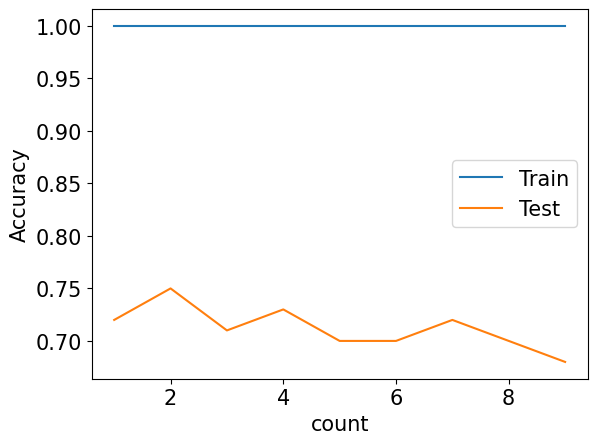

In [2]:
# 최적의 은닉노드 개수를 구하기 위한 실험
from sklearn.neural_network import MLPClassifier
import numpy as np
import matplotlib.pyplot as plt
train_rate=[]
test_rate=[]
for i in range(100,301,100): # 첫번째 은닉층의 노드수 100~300
    for j in range(100,301,100): #두번째 은닉층의 노드수 100~300
        model=MLPClassifier(random_state=100, hidden_layer_sizes=[i,j],max_iter=1000)
        model.fit(X_train[:100],y_train[:100])
        train_rate.append(model.score(X_train[:100],y_train[:100]))
        test_rate.append(model.score(X_test[:100],y_test[:100]))
plt.rcParams['font.size']=15
plt.plot(range(1,10),train_rate,label='Train')
plt.plot(range(1,10),test_rate,label='Test')
plt.ylabel('Accuracy')
plt.xlabel('count')
plt.legend()

In [3]:
max_rate=max(test_rate) #최대값
idx=np.where(test_rate == max_rate)[0][0] #최대값의 인덱스값
print('idx:',idx)
print('최적의 정확도:',max_rate)
cnt=0
for i in range(100,301,100):
    for j in range(100,301,100):
        if cnt == idx:
            print(i,j)
            break
        cnt+=1

idx: 1
최적의 정확도: 0.75
100 200
200 100
300 100


In [4]:
#실험을 통해 구한 최적의 은닉노드수로 만든 모형
model=MLPClassifier(hidden_layer_sizes=[100,200],random_state=100)
model.fit(X_train[:100],y_train[:100])
print("학습용:",model.score(X_train[:100], y_train[:100]))
print("검증용:",model.score(X_test[:100], y_test[:100]))

학습용: 1.0
검증용: 0.75


In [5]:
#모형 저장
import pickle
pickle.dump(model, open('c:/data/mnist/mnist_ann.model', 'wb'))

In [6]:
# 모형 불러오기
model = pickle.load(open('c:/data/mnist/mnist_ann.model', 'rb'))

In [7]:
# 모형 사용
pred = model.predict(X_test[:10])
print('예측값:',pred[:10])
print('실제값:',y_test[:10])

예측값: [7 2 1 0 4 1 9 4 4 9]
실제값: [7 2 1 0 4 1 4 9 5 9]


In [8]:
#confusion matrix(혼동행렬, 오분류표) 출력
from sklearn.metrics import confusion_matrix
import pandas as pd
pred=model.predict(X_test)
cm=confusion_matrix(y_test, pred)
df_cm=pd.DataFrame(cm, index=range(10), columns=range(10))
df_cm

,0,1,2,3,4,5,6,7,8,9
0,915,0,3,0,8,6,30,4,4,10
1,0,1080,1,1,1,1,1,0,49,1
2,29,174,662,10,73,5,23,13,30,13
3,12,29,55,800,8,16,10,5,37,38
4,3,12,2,0,849,1,31,7,0,77
5,58,12,22,248,128,247,32,15,86,44
6,37,28,15,0,140,7,726,1,1,3
7,2,47,19,9,33,4,1,752,17,144
8,57,79,48,41,98,22,11,11,423,184
9,14,12,6,10,412,3,3,121,1,427


In [9]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87       980
           1       0.73      0.95      0.83      1135
           2       0.79      0.64      0.71      1032
           3       0.71      0.79      0.75      1010
           4       0.49      0.86      0.62       982
           5       0.79      0.28      0.41       892
           6       0.84      0.76      0.80       958
           7       0.81      0.73      0.77      1028
           8       0.65      0.43      0.52       974
           9       0.45      0.42      0.44      1009

    accuracy                           0.69     10000
   macro avg       0.71      0.68      0.67     10000
weighted avg       0.71      0.69      0.68     10000

